## kNN Exercises
Create a new notebook, `knn_model`, and work with the `titanic` dataset to answer the following:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import acquire
from prepare import prep_titanic_data

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
# prepare the data
train, validate, test = prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [3]:
baseline_prediction = y_train.mode()

In [6]:
baseline_prediction[0]

0

In [7]:
pd.Series(baseline_prediction[0], range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [8]:
def establish_baseline(y_train):
    #est baseline
    baseline_prediction = y_train.mode()
    
    #create series of prediction with that baseline val
    #same len as y_train
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))
    
    #compute the confusion matrix for Accuracy
    cm= confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [ ]:
# write a function to compute the baseline for a classification model

def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [9]:
establish_baseline(y_train)

0.6164658634538153

# 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
# MAKE the thing
knn = KNeighborsClassifier()

# FIT the thing
knn.fit(X_train, y_train)

# USE the thing
y_train_pred = knn.predict(X_train)

# 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [11]:
#get the accuracy score of train set
train_score =  knn.score(X_train, y_train)
train_score

0.7951807228915663

In [12]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,258,49
Actual 1,53,138


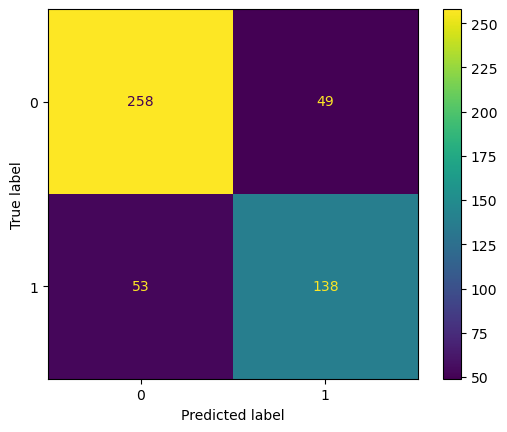

In [13]:
plot_confusion_matrix(knn, X_train, y_train)

0 : Not survived - most freq
<br>
1 : Survived

TP: 258 not survived
<br>
TN: 138 Survived

In [14]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       307
           1       0.74      0.72      0.73       191

    accuracy                           0.80       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.80      0.79       498



In [15]:
# classification report as df
pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829582,0.737968,0.795181,0.783775,0.794445
recall,0.840391,0.722513,0.795181,0.781452,0.795181
f1-score,0.834951,0.730159,0.795181,0.782555,0.794760
support,307.000000,191.000000,0.795181,498.000000,498.000000


# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp+tn)/(tp+tn+fp+fn)

true_positive_rate = (tp)/(tp+fn)
false_positive_rate = (fp)/(fp+tn)
true_negative_rate = (tn)/(fp+tn)
false_negative_rate = (fn)/(tp+fn)

precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2*(precision*recall) / (precision+recall)

support_pos = tp+fn
support_neg = fp+tn

dict = {
    'metrics': ['accuracy'
        ,'true_positive_rate'
        ,'false_positive_rate'
        ,'true_negative_rate'
        ,'false_negative_rate'
        ,'precision'
        ,'recall'
        ,'f1_score'
        ,'support_pos'
        ,'support_neg']
    ,'score': [accuracy
        ,true_positive_rate
        ,false_positive_rate
        ,true_negative_rate
        ,false_negative_rate
        ,precision
        ,recall
        ,f1_score
        ,support_pos
        ,support_neg        
    ]}
pd.DataFrame(dict)

,metrics,score
0,accuracy,0.795181
1,true_positive_rate,0.722513
2,false_positive_rate,0.159609
3,true_negative_rate,0.840391
4,false_negative_rate,0.277487
5,precision,0.737968
6,recall,0.722513
7,f1_score,0.730159
8,support_pos,191.000000
9,support_neg,307.000000


In [17]:
def print_cm_metrics(cm):
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    return pd.DataFrame(dict)

# 4. Run through steps 1-3 setting k to 10

In [18]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred

In [19]:
def evaluate_clf(model, X, y, y_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1'])

    # classification report
    crdf = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    
    # confusion matrix metrics
    metrics = print_cm_metrics(cm)
    
    return accuracy, cmdf, crdf, metrics

In [20]:
k = 10

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, X_train, y_train, X_validate)

accuracy_t, cmdf_t, crdf_t, metrics_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, metrics_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)


In [22]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{metrics_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{metrics_v}

""")

KNN where K = 10

********Train Evaluation********

Accuracy: 0.7449799196787149

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     275      32
Actual 1      95      96

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.743243    0.750000   0.74498    0.746622      0.745835
recall       0.895765    0.502618   0.74498    0.699192      0.744980
f1-score     0.812408    0.601881   0.74498    0.707144      0.731663
support    307.000000  191.000000   0.74498  498.000000    498.000000

Metrics: 
                metric       score
0             accuracy    0.744980
1   true_positive_rate    0.502618
2  false_positive_rate    0.104235
3   true_negative_rate    0.895765
4  false_negative_rate    0.497382
5            precision    0.750000
6               recall    0.502618
7             f1_score    0.601881
8          support_pos  191.000000
9          support_neg  307.000000
 
________________________________________________

***

# 5. Run through steps 1-3 setting k to 20

In [23]:
k = 20

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, X_train, y_train, X_validate)

accuracy_t, cmdf_t, crdf_t, metrics_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, metrics_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)


In [24]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{metrics_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{metrics_v}

""")

KNN where K = 20

********Train Evaluation********

Accuracy: 0.7188755020080321

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     269      38
Actual 1     102      89

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.725067    0.700787  0.718876    0.712927      0.715755
recall       0.876221    0.465969  0.718876    0.671095      0.718876
f1-score     0.793510    0.559748  0.718876    0.676629      0.703855
support    307.000000  191.000000  0.718876  498.000000    498.000000

Metrics: 
                metric       score
0             accuracy    0.718876
1   true_positive_rate    0.465969
2  false_positive_rate    0.123779
3   true_negative_rate    0.876221
4  false_negative_rate    0.534031
5            precision    0.700787
6               recall    0.465969
7             f1_score    0.559748
8          support_pos  191.000000
9          support_neg  307.000000
 
________________________________________________

***

# 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

# 7. Which model performs best on our out-of-sample data from `validate`?

<div class="alert alert-block alert-success">
<b>Takeaway:</b>
    <br>
Of the two k options (10 & 20) 10 nearest neighbors works best on the in-sample and out-of-sample data. However, the f1 score is better on the model where k = 20, so it is a bit more balanced. 
<br>  
<br>
BUT, let's loop through different K's and see what number of neighbors gives us the best results. </div>

In [25]:
metrics = []

for k in range(1, 21):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, y_train, X_validate)
    
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {"k": k,
             "train_accuracy": train_acc,
             "validate_accuracy": val_acc}
    
    metrics.append(output)
    
eval_df = pd.DataFrame(metrics)
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.995984,0.700935,0.295049
1,2,0.827309,0.696262,0.131048
2,3,0.839357,0.742991,0.096367
3,4,0.797189,0.710280,0.086908
4,5,0.795181,0.714953,0.080227
5,6,0.765060,0.728972,0.036088
6,7,0.763052,0.705607,0.057445
7,8,0.746988,0.719626,0.027362
8,9,0.763052,0.696262,0.066791
9,10,0.744980,0.724299,0.020681


In [26]:
eval_df.sort_values('difference')

,k,train_accuracy,validate_accuracy,difference
14,15,0.726908,0.738318,-0.011410
13,14,0.728916,0.738318,-0.009402
17,18,0.732932,0.738318,-0.005386
18,19,0.712851,0.714953,-0.002102
12,13,0.726908,0.728972,-0.002064
15,16,0.732932,0.733645,-0.000713
11,12,0.736948,0.733645,0.003303
19,20,0.718876,0.714953,0.003922
16,17,0.724900,0.714953,0.009946
10,11,0.744980,0.733645,0.011335


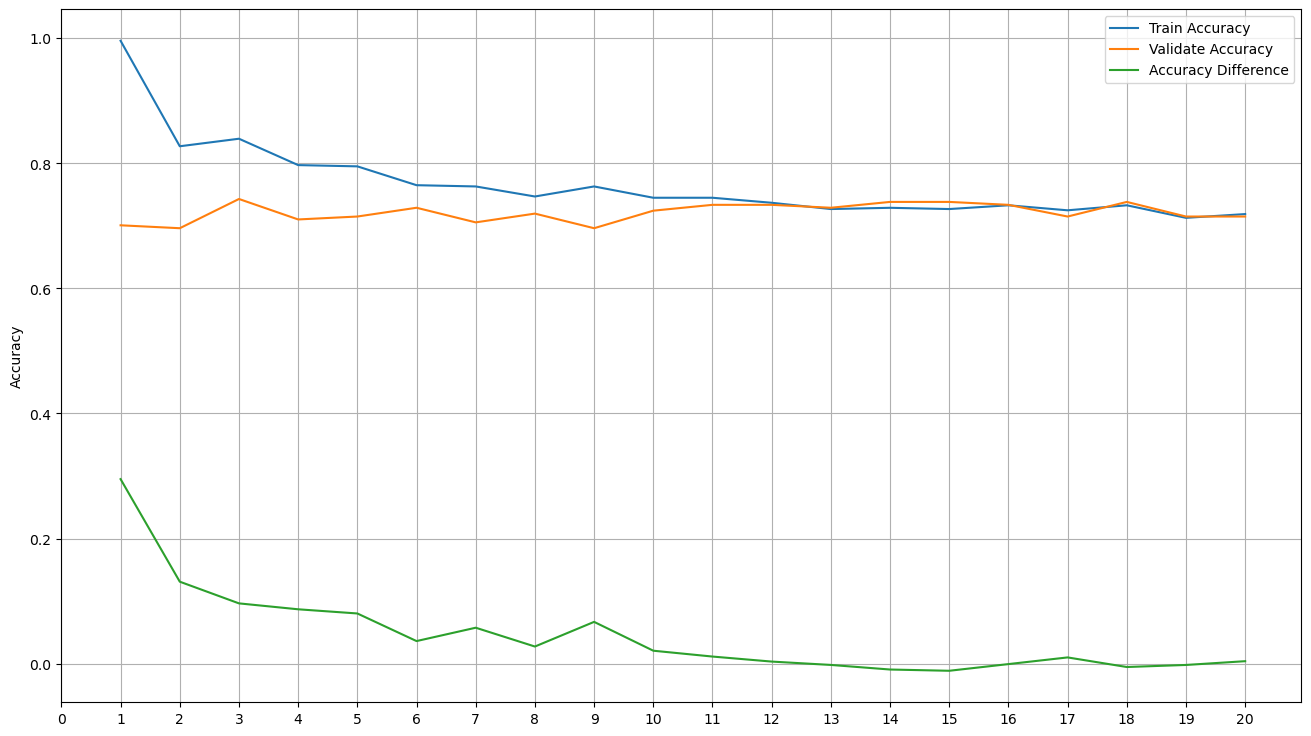

In [27]:
# plot the data
plt.figure(figsize=(16,9))
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

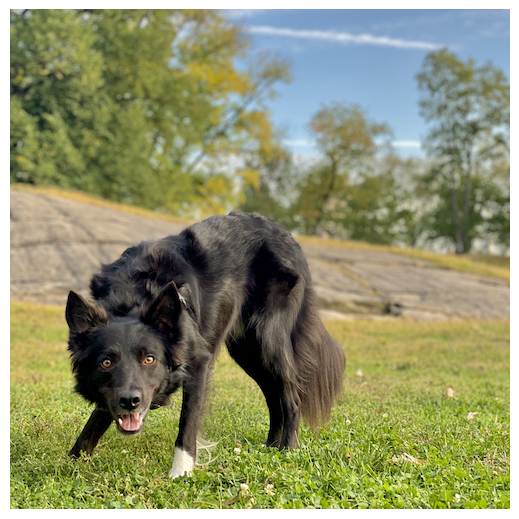

In [28]:
import seaborn as sns

sns.dogplot()

<div class="alert alert-block alert-success">
<b>Takeaway:</b>
    <br>
Looking at this chart, I would select k=12 as the best model, as the difference is closest to zero.
    </div>